In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gd

In [260]:
train_data=pd.read_csv('train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [261]:
test_data=pd.read_csv('test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [262]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [263]:
print(train_data.shape)

(1460, 81)


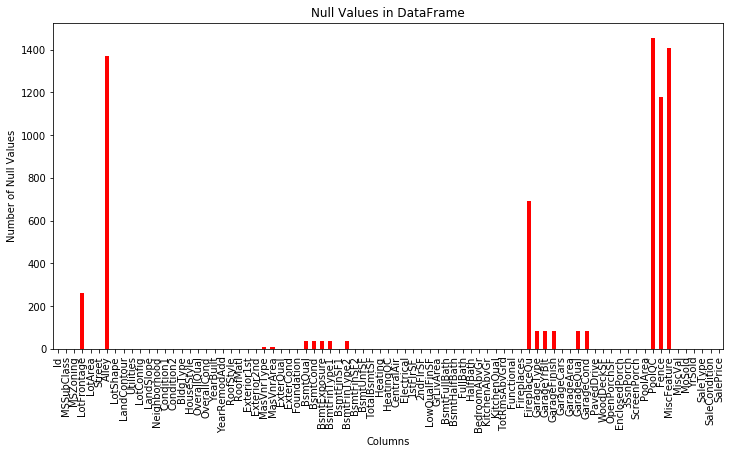

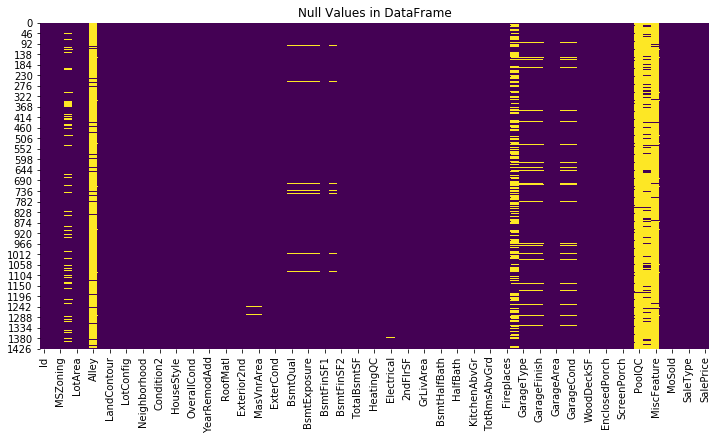

In [264]:
#getting null value count in each column and plotting a bar graph and a heat map
null_counts = train_data.isnull().sum()

# Plot a bar chart using matplotlib
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='red')
plt.title('Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

# Alternatively, use a heatmap with seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values in DataFrame')
plt.show()

#Pre-processing the raw data

In [265]:
#removing the columns which have null values greater than 50%
train_data.drop(['PoolQC','Fence','MiscFeature','Alley','GarageYrBlt','Id'],axis=1,inplace=True)

In [266]:
#Using mode for features having non-integer entries
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])

In [267]:
#Using mean for features having integer entries
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [268]:
print(train_data.shape) #This shows that 6 features have been removed as they had many null values

(1460, 75)


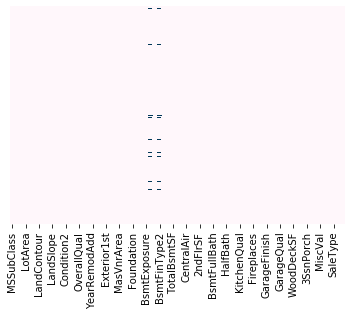

In [269]:
#checking the heat map to see if we have more null values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

In [270]:
#new removing the rows with null values
train_data.dropna(inplace=True) 
print(train_data.shape)

(1421, 75)


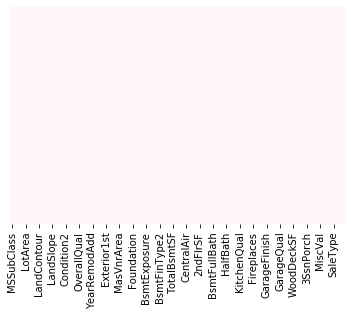

In [271]:
#checking the heat map again
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

#Pre-processing test_data

In [272]:
test_data.shape

(1459, 80)

In [273]:
test_data.drop(['PoolQC','Fence','MiscFeature','Alley','GarageYrBlt','Id'],axis=1,inplace=True)
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MSZoning']=test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mean())
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mean())
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())

In [274]:
test_data.shape
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 no

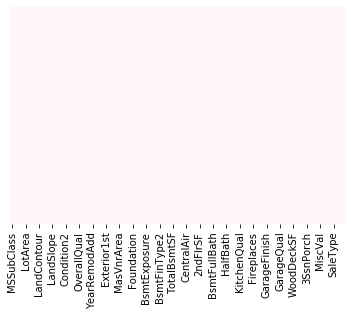

In [275]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

#Converting columns with object data into One-Hot Encoded data

In [276]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [277]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [278]:
main_df=train_data.copy()

In [279]:
final_df=pd.concat([train_data,test_data],axis=0,sort=False)
print(train_data.shape)
test_data.shape

(1421, 75)


(1459, 74)

In [280]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [281]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [282]:
final_df.shape

(2880, 175)

In [283]:
df_Train=final_df.iloc[:1421,:]
df_Test=final_df.iloc[1421:,:]

In [284]:
df_Test['SalePrice']
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Arsh\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Applying KNN

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

In [286]:
df_Train.shape
final_file= df_Train

In [287]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [288]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(df_Test)
print(type(X_train_scaled ))

<class 'numpy.ndarray'>


In [289]:
k = 35
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                    weights='uniform')

In [290]:
y_pred = knn_model.predict(X_test_scaled)
print(type(y_pred))

pred=pd.DataFrame(y_pred)   #so as to append it columnwise with the samplesubmission.csv

sub_df=pd.read_csv('sample_submission.csv')

<class 'numpy.ndarray'>


In [291]:
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

sub_df['SalePrice'] = sub_df['SalePrice'].astype('category')
sub_df.drop(['Id'],axis=1,inplace=True)

a=sub_df.to_numpy()
y_true = a.flatten() #to make the 2D array into a 1D array
print(y_true)
print(type(y_true))

[131147.37142857 147631.42857143 191085.71428571 ... 144954.28571429
 139197.14285714 195187.14285714]
<class 'numpy.ndarray'>


[132063.47058824 147708.82352941 190470.58823529 ... 144850.
 139055.88235294 194795.58823529]


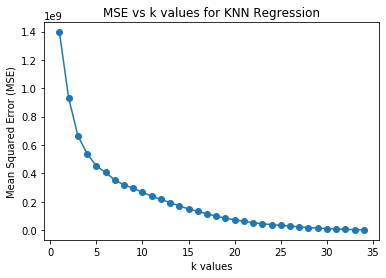

In [292]:
#Best value of k is close to sqaure root of the number of entries ie around 1460
k_values = range(1, 35)
mean_squared_errors = []
mse_values=[]
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_true,y_pred)
    mse_values.append(mse)

print(y_pred)
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs k values for KNN Regression')
plt.show()

In [293]:
#Creating an Excel file of the output
data = {'Id': range(1461, 1461 + len(y_pred)), 'SalePrice': y_pred}

# Create a DataFrame
df = pd.DataFrame(data)
# data = range(1461, 1461 + len(df))
# df = pd.DataFrame(data,y_pred, columns=['Id','SalePrice'])
excel_file_name = 'output.xlsx'
df.to_excel(excel_file_name, index=False)
print(f'Excel file "{excel_file_name}" created successfully.')

Excel file "output.xlsx" created successfully.


#Clustering

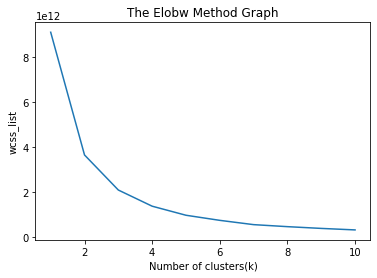

In [294]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(final_file)
    wcss_list.append(kmeans.inertia_) #the attribute inertia_ represents the within-cluster sum of squares (WCSS) or the sum of squared distances between data points and the centroids of the clusters they belong to.
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [295]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(final_file)

In [296]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(final_file)

#view cluster assignments for each observation
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [297]:
#append cluster assingments to original DataFrame
train_data['cluster'] = kmeans.labels_

#view updated DataFrame
print(train_data)
train_data.to_csv('sample.csv',index=False)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch S

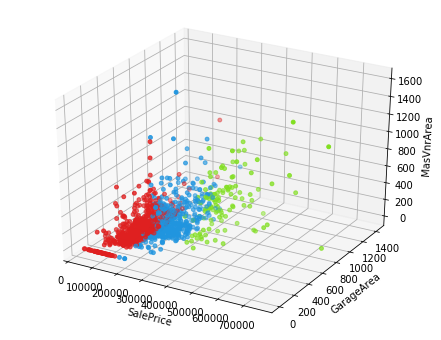

In [304]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
train_data['cluster'] = kmeans.fit_predict(train_data[['SalePrice', 'GarageArea', 'MasVnrArea']])
train_data['c'] = train_data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(train_data.SalePrice, train_data.GarageArea, train_data.MasVnrArea, c=train_data.c, s=15)
ax.set_xlabel('SalePrice')
ax.set_ylabel('GarageArea')
ax.set_zlabel('MasVnrArea')
plt.show()

#Gradio

In [308]:
import gradio as gr
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Assuming your CSV files have the necessary data
X_train = pd.read_csv('C:/Users/Arsh/Downloads/gradio_train2.csv')
Y_input = pd.read_csv('C:/Users/Arsh/Downloads/train.csv')
X_test = pd.read_csv('C:/Users/Arsh/Downloads/gradio_test.csv')
y_train = Y_input['SalePrice']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

def predict_price(feature1, feature2, feature3, feature4, feature5):
    scaled_features = scaler.transform([[feature1, feature2, feature3, feature4, feature5]])
    predicted_price = knn_model.predict(scaled_features)[0]
    return predicted_price

input_components = [gr.Number(label=f"Feature {i+1}") for i in range(5)]

iface = gr.Interface(
    fn=predict_price,
    inputs=input_components,
    output="text",
    live=False,
    title="House Price Prediction",
    description="Predict house prices using a KNN model with 5 features.",
)

# Launch the Gradio interface
iface.launch()

Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.
